In [1]:
import numpy as np
import pylab as pl
import astropy.io.fits as fits

from glob import glob

## Imagem Bias combinada

In [41]:
#Criando um lista com as imagens a serem combinadas

In [31]:
imagens = glob('Bias_*.fits')

imagens

['bias_000.fits',
 'bias_001.fits',
 'bias_002.fits',
 'bias_003.fits',
 'bias_004.fits',
 'bias_005.fits',
 'bias_006.fits',
 'bias_007.fits',
 'bias_008.fits',
 'bias_009.fits']

In [32]:
#Combinando todas as imagens da lista

In [5]:
data0  = fits.getdata(imagens[0])
data1  = fits.getdata(imagens[0])

for i in range(1,len(imagens)):
    data1 += fits.getdata(imagens[i])
    
data_stk = data1/len(imagens)

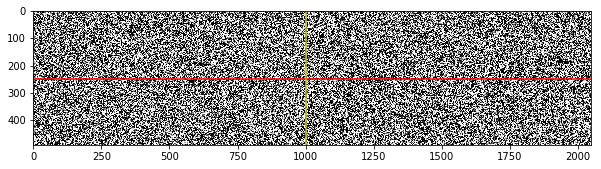

In [6]:
pl.figure(figsize=[10,10])

pl.imshow(data_stk, cmap='gray', vmin=data_stk.mean() - 0.5*data_stk.std(), 
          vmax=data_stk.mean() + 0.5*data_stk.std())

pl.axhline(250, color='r')
pl.axvline(1000, color='y')

pl.show()


In [33]:
#Observando a diferença entre uma imagem inicial e a imagem combinada

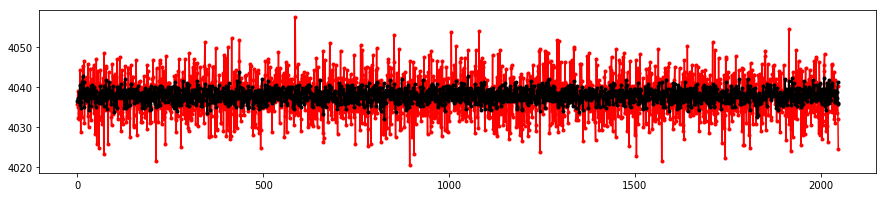

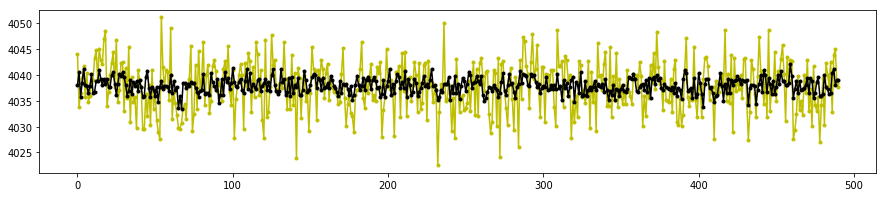

In [7]:
pl.figure(figsize=[15,3])
pl.plot(data0[250], 'r.-')
pl.plot(data_stk[250], 'k.-')
pl.show()

pl.figure(figsize=[15,3])
pl.plot(data0[:,1024], 'y.-')
pl.plot(data_stk[:,1024], 'k.-')
pl.show()

In [34]:
#Observando a diminuição do desvio padrão com a combinação das imagens

In [8]:
print('imagem bruta', np.std(data0))
print('imagem somada', np.std(data_stk))

imagem bruta 5.001792648471593
imagem somada 1.5804091154534126


In [35]:
#Criando a imagem combinada

In [10]:
bias = data_stk
hd = fits.getheader('bias_001.fits')
fits.writeto('Imagem_Bias.fits', data=bias, header=hd, overwrite=True)

## Calibração dos espectros

In [37]:
#Listando os espectros

In [71]:
espectros = glob('espectro_*.fits')
espectros.sort()
espectros

['espectro_000.fits',
 'espectro_001.fits',
 'espectro_002.fits',
 'espectro_003.fits',
 'espectro_004.fits',
 'espectro_005.fits',
 'espectro_006.fits',
 'espectro_007.fits',
 'espectro_008.fits',
 'espectro_009.fits']

In [72]:
#Criando as imagens calibradas, fazendo a diferença entre os espectros e a imagem Bias combinada

In [73]:
calibrados = []
for i in range(len(espectros)):
    calibrados.append(fits.getdata(espectros[i]) - bias)
    
calibrados

[array([[-0.86170085, -1.00694405,  2.14070422, ...,  2.98352953,
          2.91388718, -2.65223072],
        [-0.15705207,  1.1113293 ,  0.87068335, ..., -1.28219201,
          0.78180712,  1.81520659],
        [-2.36507458, -1.51205322, -0.74834654, ..., -0.8860409 ,
          2.1510142 ,  2.47440065],
        ...,
        [-0.27974824,  4.23266354, -0.43504706, ...,  1.87689041,
         -0.09188919, -1.34853493],
        [ 0.23005397, -0.6214528 , -0.67160828, ..., -0.29618379,
         -2.98691471,  0.64941559],
        [ 2.20535495, -2.91560496,  0.3287011 , ...,  2.57863246,
          2.60811922, -0.11539782]]),
 array([[ 0.04285923, -1.79891969,  0.95849439, ...,  0.63951388,
          0.05001815, -1.53496137],
        [-1.03513208, -1.27275462,  0.77841782, ...,  0.84679727,
          0.2568408 , -0.34422226],
        [-1.81392885, -1.22808646, -0.80095582, ...,  1.32103684,
          2.25255415,  2.30834524],
        ...,
        [ 0.6896696 ,  2.32681257,  0.52710364, ...,  

In [74]:
#Combinando as imagens calibradas

In [75]:
data5  = calibrados[0]

for i in range(len(calibrados)):
    data5 += calibrados[i]
    
data_stk1 = data5/len(calibrados)
data_stk1

array([[-0.61842213, -1.64915188,  1.47989728, ...,  1.7522549 ,
         2.43650383, -2.13048197],
       [-0.36979748,  1.46793507, -0.0915506 , ...,  0.68354727,
         0.45135194,  1.35655356],
       [-1.61260922, -0.84078622, -0.18189622, ...,  0.40167407,
         2.46192736,  2.17345617],
       ...,
       [ 0.32316247,  1.77017176, -1.20067878, ...,  1.88689836,
         0.56710457, -1.83127522],
       [-0.60251266,  0.67836595, -0.50706332, ..., -2.32208563,
        -2.36574243, -0.02179514],
       [ 3.19496904, -2.07137473, -0.48498113, ...,  1.40506839,
         1.68850574,  0.43187198]])

In [76]:
#Plotando o espectro combinado

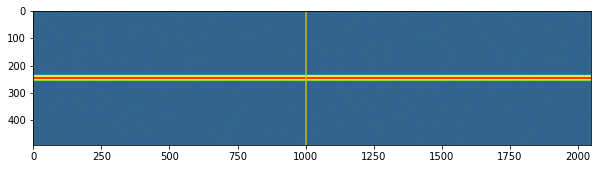

In [77]:
pl.figure(figsize=[10,10])

pl.imshow(data_stk1, cmap='viridis', vmin=data_stk1.mean() - 0.5*data_stk1.std(), 
          vmax=data_stk1.mean() + 0.5*data_stk1.std())

pl.axhline(245, color='r')
pl.axvline(1000, color='y')

pl.show()


In [78]:
#Observando a diferença entre uma imagem calibrada inicial e a imagem calibrada final

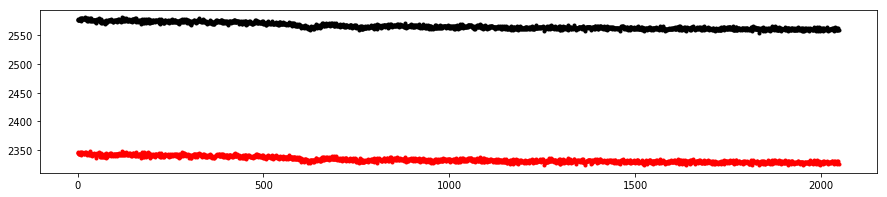

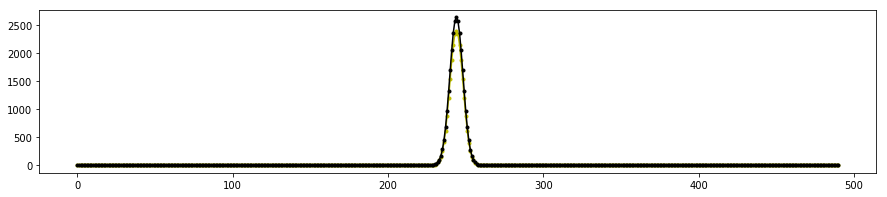

In [83]:
calibrados = []
for i in range(len(espectros)):
    calibrados.append(fits.getdata(espectros[i]) - bias)
    
data = calibrados[0]
pl.figure(figsize=[15,3])
pl.plot(data[245], 'r.-')
pl.plot(data_stk1[245], 'k.-')
pl.show()

pl.figure(figsize=[15,3])
pl.plot(data[:,1024], 'y.-')
pl.plot(data_stk1[:,1024], 'k.-')
pl.show()

In [86]:
#Salvando o espectro

In [85]:
dataFinal = data_stk1
fits.writeto('Espectro_Final.fits', data=dataFinal)